**Классификация рака молочной железы с использованием метода главных компонент (PCA) и случайного леса**

В данном примере применяется метод главных компонент (PCA) для уменьшения размерности данных и классификации рака молочной железы с помощью алгоритма случайного леса. Сначала загружаются данные, разделяются на обучающий и тестовый наборы, затем применяется PCA для уменьшения размерности до 4 компонент. Обучается модель случайного леса на обучающем наборе с использованием данных после применения PCA, и делаются предсказания на тестовом наборе. Наконец, оценивается качество модели с использованием метрик accuracy, precision, recall и F1-score.

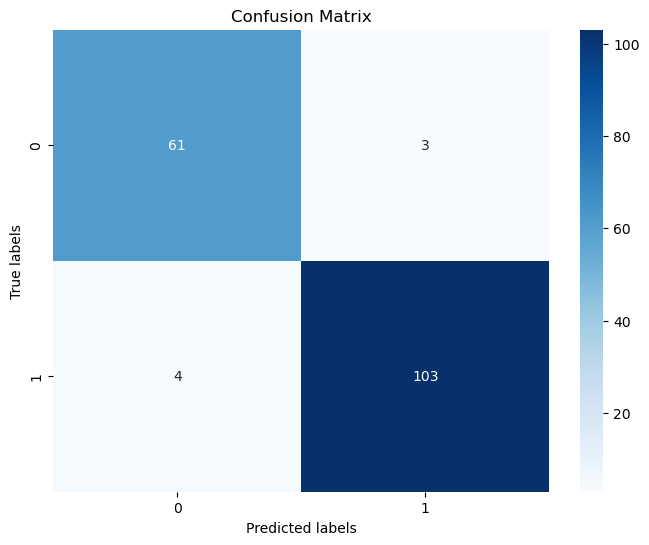

Метрики с применением PCA:
Accuracy: 0.9590643274853801
Precision: 0.9716981132075472
Recall: 0.9626168224299065
F1-score: 0.9671361502347416


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Загрузка набора данных Breast Cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)

# Применение PCA к данным
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Обучение модели случайного леса на данных после применения PCA
clf = RandomForestClassifier(n_estimators=100, random_state=54)
clf.fit(X_train_pca, y_train)

# Предсказание на тестовом наборе с применением PCA
y_pred_pca = clf.predict(X_test_pca)

# Оценка качества модели с применением PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

# Вычисление и визуализация confusion matrix
cm = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Вывод результатов
print("Метрики с применением PCA:")
print("Accuracy:", accuracy_pca)
print("Precision:", precision_pca)
print("Recall:", recall_pca)
print("F1-score:", f1_pca)
